# TASK 1: Credit Scoring Model

**Objective:** Predict an individual's **creditworthiness** using past financial data. 

**Approach:** Use **classification algorithms** like Logistic Regression, Decision Trees, or Random Forest.

**Key Features:**
* Feature engineering from financial history.
* Model accuracy assessment using metrics like **Precision, Recall, F1-Score, ROC-AUC.**
* Dataset could include: income, debts, payment history, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("/kaggle/input/creaditing-scoring-dataset/train.csv")
df.head(5)
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [3]:
df=df.drop('Loan_ID', axis=1)

In [4]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [6]:
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [8]:
df.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [10]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [11]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [12]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])

In [13]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [14]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [16]:
df['Loan_Status'].nunique()

2

In [17]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()
for i in ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']:
    df[i]=le.fit_transform(df[i])

In [20]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [21]:
x=df.iloc[:,:-1]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [22]:
y=df['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

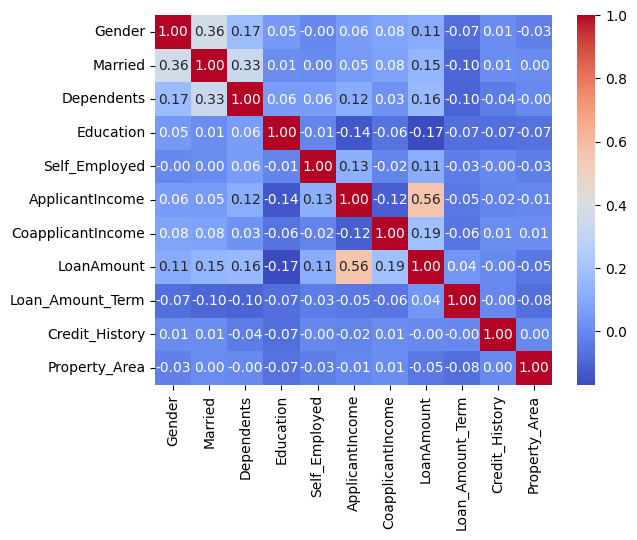

In [23]:
sns.heatmap(x.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [24]:
!pip install imbalanced-learn 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 62.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [25]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1 --force-reinstall --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 51.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.1 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.0 which is inco

In [26]:
from imblearn.over_sampling import SMOTE

s = SMOTE(random_state=42)
x_resampled, y_resampled = s.fit_resample(x, y)

In [27]:
s=SMOTE(random_state=42)
x,y=s.fit_resample(x,y)

In [28]:
y.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [29]:
y.shape

(844,)

In [30]:
x.shape

(844, 11)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
lr.score(x_test,y_test)*100

68.04733727810651

In [36]:
lr.score(x_train,y_train)*100

76.0

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
r=RandomForestClassifier()
r.fit(x_train,y_train)

RandomForestClassifier()

In [39]:
r.score(x_test,y_test)*100

79.28994082840237

In [40]:
r.score(x_train,y_train)*100

100.0

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
d=DecisionTreeClassifier()
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
d.score(x_test,y_test)*100

78.10650887573965

In [44]:
d.score(x_train,y_train)*100

100.0

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
k=KNeighborsClassifier()

In [47]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
k.score(x_test,y_test)*100

65.08875739644971

In [49]:
k.score(x_train,y_train)*100

75.70370370370371

In [50]:
from sklearn.ensemble import VotingClassifier

In [51]:
model=VotingClassifier(estimators=[('rf',r),('dt',d),('knn',k)],voting='soft')
model.fit(x_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [52]:
model.score(x_test,y_test)*100

76.33136094674556

In [53]:
y_pred=model.predict(x_test)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        94
           1       0.71      0.79      0.75        75

    accuracy                           0.76       169
   macro avg       0.76      0.77      0.76       169
weighted avg       0.77      0.76      0.76       169



In [55]:
y_probs=model.predict_proba(x_test)[:,1]
print(y_probs.shape)

(169,)


In [56]:
from sklearn.metrics import auc,roc_curve

In [57]:
fpr,tpr,threshold=roc_curve(y_test,y_probs)
roc_curve=auc(fpr,tpr)

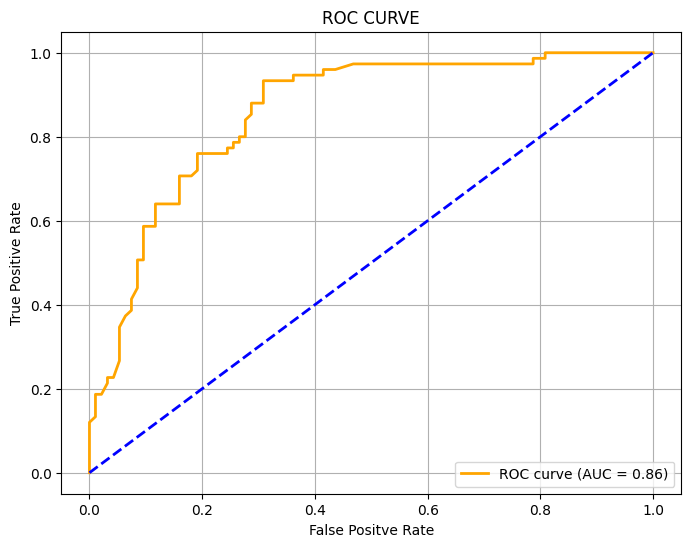

In [58]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='orange',lw=2,label=f'ROC curve (AUC = {roc_curve:.2f})')
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout
plt.show()

In [59]:
!pip install gradio scikit-learn pandas

In [60]:
import joblib

In [61]:
joblib.dump(model,"code_alphacredit2.pkl")
print("Model Saved")

Model Saved


In [62]:
import pandas as pd

df = pd.read_csv("/kaggle/input/creaditing-scoring-dataset/train.csv")

In [63]:
def predict_credit(
    Gender, Married, Dependents, Education, Self_Employed,
    ApplicantIncome, CoapplicantIncome, LoanAmount,
    Loan_Amount_Term_Years, Credit_History, Property_Area
):
    # Convert loan term from years to months
    loan_term_months = Loan_Amount_Term_Years * 12

    input_data = {
        'Gender': Gender,
        'Married': Married,
        'Dependents': Dependents,
        'Education': Education,
        'Self_Employed': Self_Employed,
        'ApplicantIncome': ApplicantIncome,
        'CoapplicantIncome': CoapplicantIncome,
        'LoanAmount': LoanAmount,
        'Loan_Amount_Term': loan_term_months,
        'Credit_History': Credit_History,
        'Property_Area': Property_Area
    }
    
    df = pd.DataFrame([input_data])
    prediction = model.predict(df)[0]
    return "Loan Approved" if prediction == 1 else "Loan Rejected"

# Interface
import gradio as gr
gr.Interface(
    fn=predict_credit,
    inputs=[
        gr.Number(label="Gender (0=Female, 1=Male)"),
        gr.Number(label="Married (0=No, 1=Yes)"),
        gr.Number(label="Dependents (0, 1, 2, 3)"),
        gr.Number(label="Education (0=Not Graduate, 1=Graduate)"),
        gr.Number(label="Self Employed (0=No, 1=Yes)"),
        gr.Number(label="Applicant Income"),
        gr.Number(label="Coapplicant Income"),
        gr.Number(label="Loan Amount"),
        gr.Number(label="Loan Term (in years)"),  # User-friendly label
        gr.Number(label="Credit History (0.0 or 1.0)"),
        gr.Number(label="Property Area (0=Rural, 1=Semiurban, 2=Urban)")
    ],
    outputs="text",
    title="Credit Worthiness  Predictor",
    description="Enter applicant details (label encoded) to predict loan approval status. Loan term is in years and will be converted to months."
).launch()

* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://c5c03c877c38bdef4e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
